# Age as a Risk Factor of COVID-19 Mortality in the Philippines

Dataset Source: https://www.kaggle.com/saurabhshahane/covid19-age-risk-factor

Excel dataset with the following columns: Case No., Age, Sex, Nationality, Status, Transmission. 

Data were extracted from https://endcov.ph/cases/

<b> Acknowledgements </b>

Medina, Michael Arieh (2020), “Data for: Age as a Risk Factor of COVID-19 Mortality in the Philippines”, Mendeley Data, V2, doi: 10.17632/gxxnmgcfnd.2

`Brief Disclaimer:` It is to be noted here that this study was only meant for educational purposes. The conclusions or observations drawn were not meant to hurt any nationality, any individual, group.

<b> Question: Given the age, find out the chances of recovery. </b>

## Dependencies or Libraries

- Importing useful libraries like numpy, pandas, matplotlib and seaborn
- `% matplotlib` is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<b> Side note:</b>  The dataset was in "dataset`.xlsx`" format which was converted to "dataset`.csv`". Importing CSV files can be much faster, and it also consumes less memory.

In [2]:
# importing the dataset into pandas dataframe(df) to understand its contents

df = pd.read_csv('dataset.csv')
df.head()

,Case,Age,Sex,Nationality,Status,Transmission
0,PH1,38,Female,Chinese,Recovered,Imported
1,PH2,44,Male,Chinese,Deceased,Imported
2,PH3,60,Female,Chinese,Recovered,Imported
3,PH4,48,Male,Filipino,Recovered,Imported
4,PH5,62,Male,Filipino,Deceased,Local


In [3]:
df = df.reindex(columns=['Case', 'Age', 'Sex', 'Nationality', 'Transmission', 'Status'])
df.head()

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Chinese,Imported,Recovered
1,PH2,44,Male,Chinese,Imported,Deceased
2,PH3,60,Female,Chinese,Imported,Recovered
3,PH4,48,Male,Filipino,Imported,Recovered
4,PH5,62,Male,Filipino,Local,Deceased


## Data Exploration

In [4]:
# Checking for null values in the dataset

df.isna().sum()

Case            0
Age             0
Sex             0
Nationality     0
Transmission    0
Status          0
dtype: int64

In [5]:
# How many samples?
len(df)

143

In [6]:
df.dtypes

Case            object
Age              int64
Sex             object
Nationality     object
Transmission    object
Status          object
dtype: object

In [7]:
print(df['Nationality'].value_counts())

Filipino              127
None                    7
Chinese                 3
American                3
British                 2
Chinese, Taiwanese      1
Name: Nationality, dtype: int64


- To simplify the computation, we need to simplify the cardinality of the Nationality feature. So we classify the data into two categories

- Filipino and Others

In [8]:
df = df.replace(['None'],'Others')
df = df.replace(['Chinese'],'Others')
df = df.replace(['American'],'Others')
df = df.replace(['British'],'Others')
df = df.replace(['Chinese, Taiwanese'],'Others')
df

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Others,Imported,Recovered
1,PH2,44,Male,Others,Imported,Deceased
2,PH3,60,Female,Others,Imported,Recovered
3,PH4,48,Male,Filipino,Imported,Recovered
4,PH5,62,Male,Filipino,Local,Deceased
...,...,...,...,...,...,...
138,PH1488,60,Male,Others,Local,Deceased
139,PH1489,74,Male,Filipino,Local,Deceased
140,PH1508,72,Female,Filipino,Local,Deceased
141,PH1811,66,Male,Filipino,Local,Deceased


In [9]:
print(df['Nationality'].value_counts())

Filipino    127
Others       16
Name: Nationality, dtype: int64


In [10]:
df.head()

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Others,Imported,Recovered
1,PH2,44,Male,Others,Imported,Deceased
2,PH3,60,Female,Others,Imported,Recovered
3,PH4,48,Male,Filipino,Imported,Recovered
4,PH5,62,Male,Filipino,Local,Deceased


In [11]:
print(df['Sex'].value_counts())

Male      101
Female     42
Name: Sex, dtype: int64


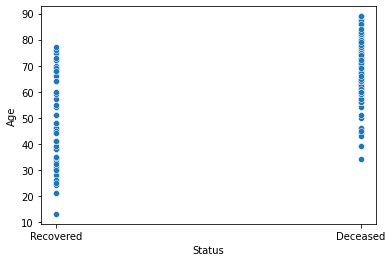

In [12]:
sns.scatterplot(x = df.Status, y = df.Age, data = df);

In [13]:
print(df['Status'].value_counts())

Deceased     93
Recovered    50
Name: Status, dtype: int64


In [14]:
print(df['Transmission'].value_counts())

Local       117
Imported     26
Name: Transmission, dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Case          143 non-null    object
 1   Age           143 non-null    int64 
 2   Sex           143 non-null    object
 3   Nationality   143 non-null    object
 4   Transmission  143 non-null    object
 5   Status        143 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.8+ KB


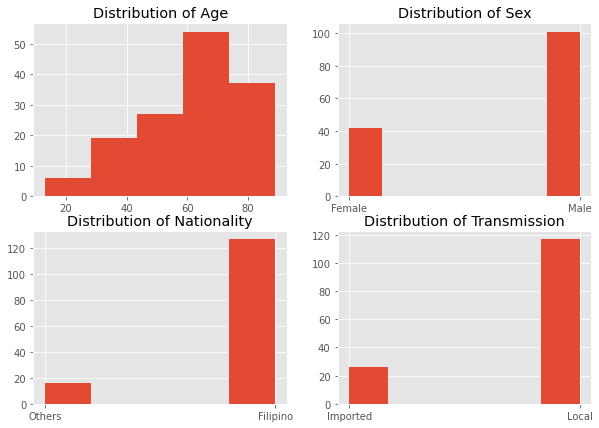

In [16]:
plt.style.use("ggplot")
fig, axes = plt.subplots(2, 2, figsize=(10,7))

axes[0,0].set_title("Distribution of Age")
axes[0,0].hist(df['Age'], bins=5);
axes[0,1].set_title("Distribution of Sex")
axes[0,1].hist(df['Sex'], bins=7);
axes[1,0].set_title("Distribution of Nationality")
axes[1,0].hist(df['Nationality'], bins=5);
axes[1,1].set_title("Distribution of Transmission")
axes[1,1].hist(df['Transmission'], bins=6);

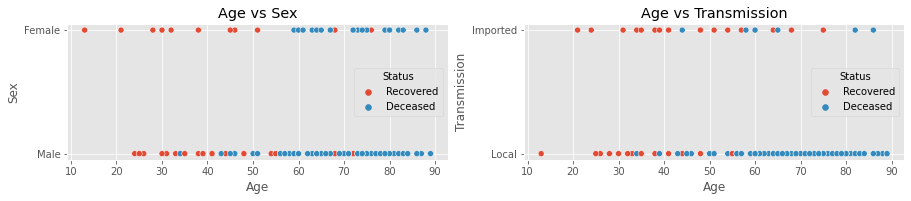

In [17]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(15, 2.5)

sns.scatterplot(ax = axs[0], x = "Age", y ="Sex", hue='Status', data = df)
axs[0].set_title("Age vs Sex")

sns.scatterplot(ax = axs[1], x = "Age", y ="Transmission", hue='Status', data = df)
axs[1].set_title("Age vs Transmission");

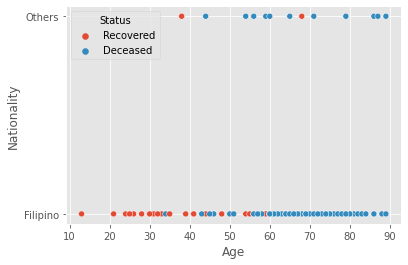

In [18]:
sns.scatterplot(x = "Age", y ="Nationality", hue='Status', data = df);

## Dealing with Categorical Variables

The text is never understood by machines.

There are three common approaches for converting ordinal and categorical variables to numerical values. They are:

    1. Ordinal Encoding - Typically used in "Place" variables such as "first", "second" and "third". We know 1>2>3. There exists a numerical relationship between the cateogories.
    
    2. One-Hot Encoding - Typically used in “color” variables with the values: “red“, “green” and “blue“, where there exists no natural relationship between red, green and blue. Red !(=, > or <) Green...
    3. Dummy Variable Encoding

----------| Nominal  | Ordinal
----------|-------- | --------
Example| Town 01,02,03.. | Satisfied, neutral, dis-satisfied
Example| Male, female | High, medium low
Example| Green, blue, red | graduate, masters, phd

    * Nominal Variable (Categorical): Variable comprises a finite set of discrete values with no relationship between values.
    * Ordinal Variable: Variable comprises a finite set of discrete values with a ranked ordering between values.
    
![title](Encoding-Map2.png)

Source: Feature Labs

In [19]:
# Cardinality / distinct count for all columns in pandas dataframe

df.apply(pd.Series.nunique)

Case            143
Age              57
Sex               2
Nationality       2
Transmission      2
Status            2
dtype: int64

In [20]:
df.head(3)

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Others,Imported,Recovered
1,PH2,44,Male,Others,Imported,Deceased
2,PH3,60,Female,Others,Imported,Recovered


## Co-Relation Heatmap

In [21]:
# To find out the co-relation between the features, we need to convert strings to integers
# df1 should not be used to feed to the machine learning models as the features nationality, Status, Transmission are all nominal variables.
df1 = df.replace(['Female'], 0)
df1 = df1.replace(['Male'], 1)

df1 = df1.replace(['Others'], 0)
df1 = df1.replace(['Filipino'], 1)

df1 = df1.replace(['Local'], 0)
df1 = df1.replace(['Imported'],1)

df1 = df1.replace(['Deceased'], 0)
df1 = df1.replace(['Recovered'], 1)
df1.head()

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,0,0,1,1
1,PH2,44,1,0,1,0
2,PH3,60,0,0,1,1
3,PH4,48,1,1,1,1
4,PH5,62,1,1,0,0


In [22]:
print(df1['Nationality'].value_counts())

1    127
0     16
Name: Nationality, dtype: int64


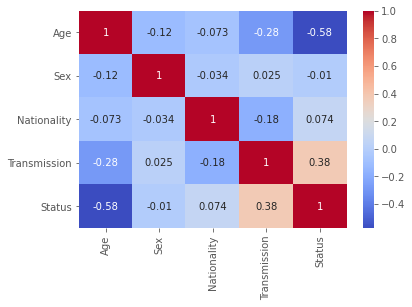

In [23]:
sns.heatmap(df1.corr(method='pearson'), annot=True, cmap='coolwarm');

<b>Initial Observations</b>

- The given dataset is not balanced for the feature "Sex" as it contains more 'Male'.
- The given dataset is not balanced for the feature "Nationality" as `Filipino` in the nationality feature dominates.
- It seems that more people died than getting recoverd from COVID.
- Scatterplot suggests that people who died were beyond the age 30. So, it seems like the chances of getting recovered for the age below 30 is extremely high.
- The transmission is more local than imported. 
- It is also important to explore more about how the data collection was done as the dataset contains more `filipino` data when compared to other nationalities.
- Age seems to be ~60% negatively co-related with Status. There is little to no co-relation between any of the pairs except 'Age and Status'

## Choosing the Right machine learning model

Map of choosing the right model: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

* Are we predicting a category? 

    * `Yes` Given the age, we are trying to predict if the person will recover or not.

* Do we have labeled data?

    * `Yes`

* Do we have 100k+ samples?

Answer: `No`

    * Attempt 1: Try Stochastic Gradient Descent (SGD) Classifier

## Model 1 - Ignoring All other features except Age
- Dropping case, sex, nationality, transmission
- One hot encoding the status

In [24]:
df1 = df
df1.head()

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Others,Imported,Recovered
1,PH2,44,Male,Others,Imported,Deceased
2,PH3,60,Female,Others,Imported,Recovered
3,PH4,48,Male,Filipino,Imported,Recovered
4,PH5,62,Male,Filipino,Local,Deceased


In [25]:
df1 = df1.drop('Case', axis = 1)
df1 = df1.drop('Sex', axis = 1)
df1 = df1.drop('Nationality', axis = 1)
df1 = df1.drop('Transmission', axis = 1)
df1.head()

,Age,Status
0,38,Recovered
1,44,Deceased
2,60,Recovered
3,48,Recovered
4,62,Deceased


In [26]:
# Create dummy columns
dummies = pd.get_dummies(df1[['Status']])

# Merge with dataframe
merged_df = pd.concat([df1, dummies], axis = 'columns')

# Drop status and deceased column
# Simple_df signifies that it is a dataframe of simple model ignoring other features

simple_df = merged_df.drop(['Status','Status_Deceased'], axis = 'columns')


In [27]:
merged_df.head()

,Age,Status,Status_Deceased,Status_Recovered
0,38,Recovered,0,1
1,44,Deceased,1,0
2,60,Recovered,0,1
3,48,Recovered,0,1
4,62,Deceased,1,0


In [28]:
# deceased = 0 and recovered = 1

simple_df.rename(columns = {'Status_Recovered':'Status'}, inplace = True)
simple_df

,Age,Status
0,38,1
1,44,0
2,60,1
3,48,1
4,62,0
...,...,...
138,60,0
139,74,0
140,72,0
141,66,0


### SGD Classifier

In [37]:
from sklearn.linear_model import SGDClassifier
np.random.seed(1)

# Assign x = age
x = simple_df.drop('Status', axis = 1)

# Assign y = status (deceased or recovered)
y = simple_df.Status

# Split the dataset into two parts ( 70 % training set, 30 % testing set)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

# score
sgd.score(x_test, y_test)

0.7209302325581395

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

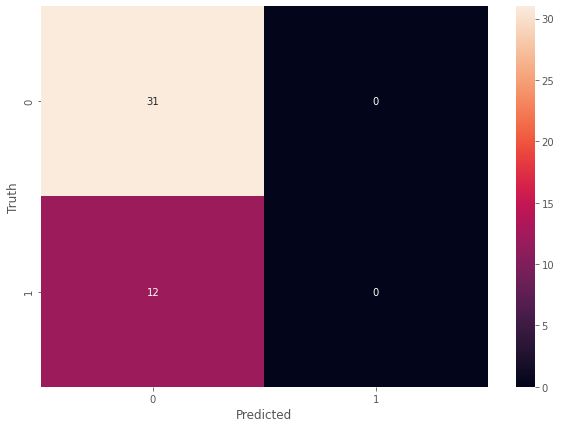

In [31]:
from sklearn.metrics import confusion_matrix
y_predicted = sgd.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Kernel Approximation

Radial Basis Function - rbf

In [57]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
import random
random.seed(1)

x = simple_df.drop('Status', axis = 1)
y = simple_df.Status

# Split the dataset into two parts ( 70 % training set, 30 % testing set)
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

rbf_feature = RBFSampler()
x_train = rbf_feature.fit_transform(x_train)
x_test = rbf_feature.fit_transform(x_test)

kernel = SGDClassifier()
kernel.fit(x_train, y_train)

# score
kernel.score(x_test, y_test)

0.627906976744186

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

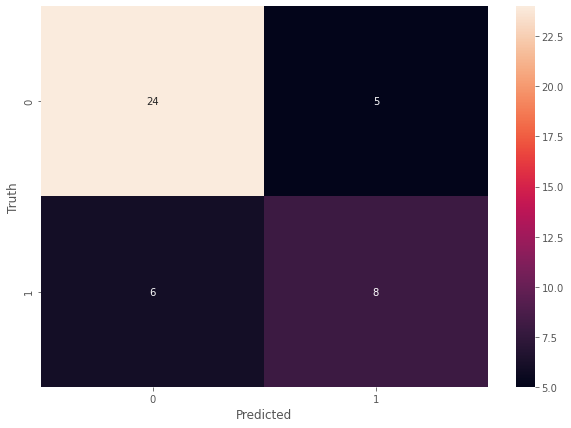

In [36]:
y_predicted = kernel.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Attempt 3: Random Forest Classifier

Random Forest is a `low bias` and `high variance` model. But the majority voting reduces the variance of the model.

* Import RandomForestClassifier class
* Setup random seeding = 3
* Create Feature Matrix (x)
* Create Labels (y)
* Split the data
* Instantiate RandomForestClassifier
* Fit the model
* Evaluate RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier  
np.random.seed(1)

x = simple_df.drop('Status', axis = 1)
y = simple_df.Status

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)


rfc.score(x_test, y_test)

0.6551724137931034

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

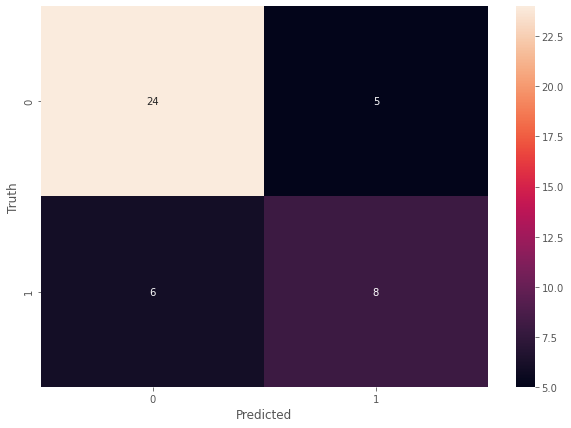

In [53]:
y_preds = rfc.predict(x_test)
confusion_matrix(y_test, y_preds)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Model 2 - Including other features

In [60]:
df.head()

,Case,Age,Sex,Nationality,Transmission,Status
0,PH1,38,Female,Others,Imported,Recovered
1,PH2,44,Male,Others,Imported,Deceased
2,PH3,60,Female,Others,Imported,Recovered
3,PH4,48,Male,Filipino,Imported,Recovered
4,PH5,62,Male,Filipino,Local,Deceased


In [70]:
# Hot Encoding

# Create dummy columns

dummies1 = pd.get_dummies(df[['Sex']])
dummies2 = pd.get_dummies(df[['Nationality']])
dummies3 = pd.get_dummies(df[['Transmission']])
dummies4 = pd.get_dummies(df[['Status']])

# Merge with dataframe, model2_df includes other features
merged_df = pd.concat([df, dummies1, dummies2, dummies3, dummies4], axis = 'columns')

# Drop Case, Sex, Nationality, Transmission, Status....and all the first columns
model2_df = merged_df.drop(['Case', 'Sex', 'Nationality', 'Transmission', 'Status', 'Sex_Female', 'Nationality_Filipino', 'Transmission_Imported', 'Status_Deceased'], axis = 1)
model2_df

,Age,Sex_Male,Nationality_Others,Transmission_Local,Status_Recovered
0,38,0,1,0,1
1,44,1,1,0,0
2,60,0,1,0,1
3,48,1,0,0,1
4,62,1,0,1,0
...,...,...,...,...,...
138,60,1,1,1,0
139,74,1,0,1,0
140,72,0,0,1,0
141,66,1,0,1,0


### SGD Classifier

In [79]:
from sklearn.linear_model import SGDClassifier
np.random.seed(2)

# x = Features
x = model2_df.drop('Status_Recovered', axis = 1)

# Assign y = status column
y = model2_df.Status_Recovered

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

sgd.score(x_test, y_test)

0.6976744186046512

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

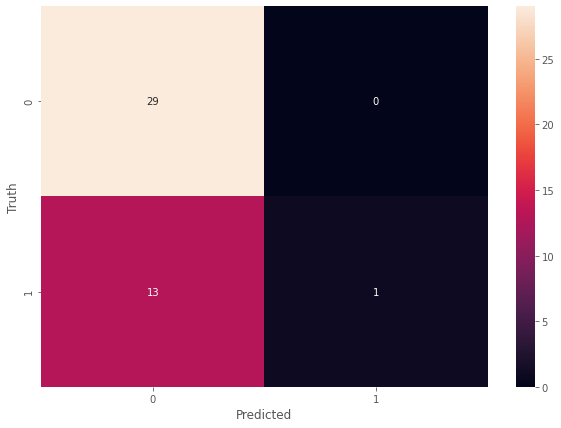

In [80]:
from sklearn.metrics import confusion_matrix
y_predicted = sgd.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Kernel Approximation

In [95]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
import random
random.seed(1)

# x = Features
x = model2_df.drop('Status_Recovered', axis = 1)

# Assign y = status column
y = model2_df.Status_Recovered

# Split the dataset into two parts ( 70 % training set, 30 % testing set)
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

rbf_feature = RBFSampler()
x_train = rbf_feature.fit_transform(x_train)
x_test = rbf_feature.fit_transform(x_test)

kernel = SGDClassifier()
kernel.fit(x_train, y_train)

# score
kernel.score(x_test, y_test)

0.5116279069767442

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

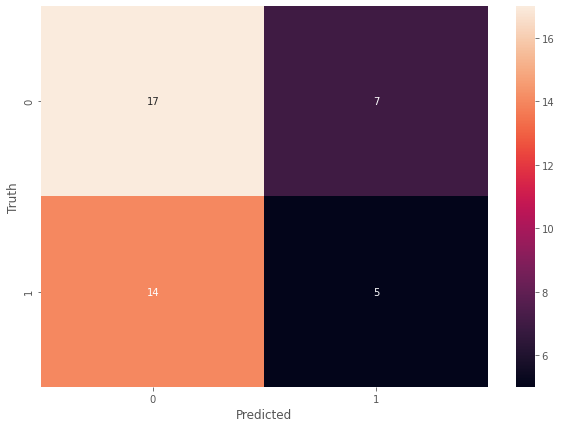

In [92]:
y_predicted = kernel.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Random Forest Classifier

In [83]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
import random
random.seed(1)

# x = Features
x = model2_df.drop('Status_Recovered', axis = 1)

# Assign y = status column
y = model2_df.Status_Recovered

# Split the dataset into two parts ( 70 % training set, 30 % testing set)
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

rbf_feature = RBFSampler()
x_train = rbf_feature.fit_transform(x_train)
x_test = rbf_feature.fit_transform(x_test)

kernel = SGDClassifier()
kernel.fit(x_train, y_train)

# score
kernel.score(x_test, y_test)

0.5116279069767442

Text(69.0, 0.5, 'Truth')

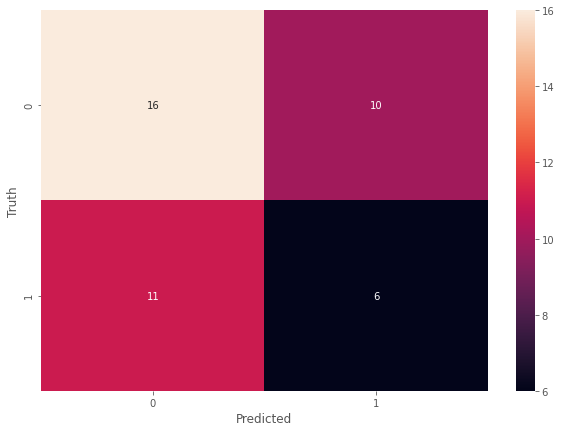

In [84]:
y_predicted = kernel.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [88]:
from sklearn.ensemble import RandomForestClassifier  
np.random.seed(1)

# x = Features
x = model2_df.drop('Status_Recovered', axis = 1)

# Assign y = status column
y = model2_df.Status_Recovered

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

rfc = RandomForestClassifier(n_estimators = 50)
rfc.fit(x_train, y_train)


rfc.score(x_test, y_test)

0.8275862068965517

#### Confusion Matrix

Text(69.0, 0.5, 'Truth')

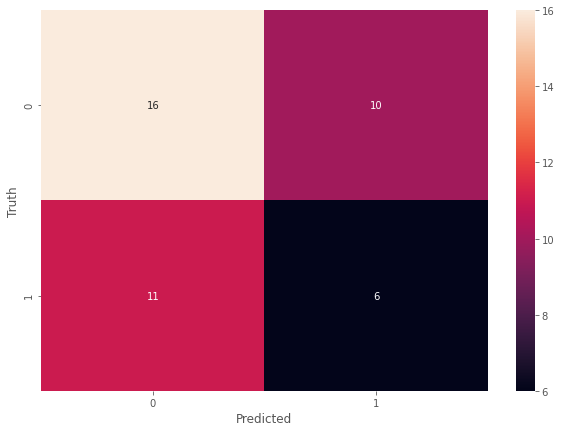

In [89]:
y_preds = rfc.predict(x_test)
confusion_matrix(y_test, y_preds)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')